In [1]:
import sqlite3
print(sqlite3.sqlite_version)

3.45.3


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Connect to SQLite database
conn = sqlite3.connect("stock_market_2025.db")
cursor = conn.cursor()

In [4]:
# Create table if not exists
cursor.execute("""
CREATE TABLE IF NOT EXISTS stocks (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT,
    ticker TEXT,
    open REAL,
    close REAL,
    volume INTEGER,
    sector TEXT,
    price_change REAL
)
""")
print("Table ready.")

Table ready.


In [5]:
# Insert 20 rows of sample data, including NULL values for 'close'
sample_data = [
    ("2025-09-01", "AAPL", 150.0, 155.0, 50000000, "Technology", None),
    ("2025-09-01", "GOOGL", 2800.0, None, 1500000, "Technology", None),          # Null close here
    ("2025-09-01", "TSLA", 700.0, 710.0, 30000000, "Automotive", None),
    ("2025-09-02", "AAPL", 155.0, 154.0, 48000000, "Technology", None),
    ("2025-09-02", "GOOGL", 2825.0, 2835.0, 1600000, "Technology", None),
    ("2025-09-02", "TSLA", 710.0, 698.0, 32000000, "Automotive", None),
    ("2025-09-03", "MSFT", 310.0, 315.0, 22000000, "Technology", None),
    ("2025-09-03", "AMZN", 3450.0, 3400.0, 1300000, "Consumer Discretionary", None),
    ("2025-09-03", "FB", 360.0, 355.0, 18000000, "Technology", None),
    ("2025-09-04", "NFLX", 600.0, 605.0, 9000000, "Communication Services", None),
    ("2025-09-04", "NVDA", 750.0, 760.0, 17000000, "Technology", None),
    ("2025-09-05", "BABA", 220.0, None, 11000000, "Consumer Discretionary", None), # Null close here
    ("2025-09-05", "DIS", 170.0, 172.0, 14000000, "Communication Services", None),
    ("2025-09-06", "PFE", 48.0, 47.5, 27000000, "Healthcare", None),
    ("2025-09-06", "JNJ", 165.0, 166.0, 16000000, "Healthcare", None),
    ("2025-09-07", "XOM", 70.0, 69.0, 20000000, "Energy", None),
    ("2025-09-07", "CVX", 100.0, 102.0, 15000000, "Energy", None),
    ("2025-09-08", "WMT", 140.0, 138.0, 23000000, "Consumer Staples", None),
    ("2025-09-08", "KO", 55.0, 56.0, 19000000, "Consumer Staples", None),
    ("2025-09-09", "PYPL", 260.0, 262.0, 12500000, "Technology", None)
]

cursor.execute("DELETE FROM stocks")  # Clear old data
cursor.executemany("""
INSERT INTO stocks (date, ticker, open, close, volume, sector, price_change)
VALUES (?, ?, ?, ?, ?, ?, ?)
""", sample_data)
conn.commit()
print("Inserted 20 rows with some NULL close values.")


Inserted 20 rows with some NULL close values.


In [6]:
# Extract data into pandas DataFrame
stock = pd.read_sql_query("SELECT * FROM stocks", conn)
print("\nInitial extracted data with NULLs:")


Initial extracted data with NULLs:


In [7]:
stock.head()

,id,date,ticker,open,close,volume,sector,price_change
0,21,2025-09-01,AAPL,150.0,155.0,50000000,Technology,None
1,22,2025-09-01,GOOGL,2800.0,NaN,1500000,Technology,None
2,23,2025-09-01,TSLA,700.0,710.0,30000000,Automotive,None
3,24,2025-09-02,AAPL,155.0,154.0,48000000,Technology,None
4,25,2025-09-02,GOOGL,2825.0,2835.0,1600000,Technology,None


In [8]:
stock.tail()

,id,date,ticker,open,close,volume,sector,price_change
15,36,2025-09-07,XOM,70.0,69.0,20000000,Energy,None
16,37,2025-09-07,CVX,100.0,102.0,15000000,Energy,None
17,38,2025-09-08,WMT,140.0,138.0,23000000,Consumer Staples,None
18,39,2025-09-08,KO,55.0,56.0,19000000,Consumer Staples,None
19,40,2025-09-09,PYPL,260.0,262.0,12500000,Technology,None


In [9]:
# Handle missing 'close' values by forward fill (or choose any method)
print("\nMissing values before cleaning:")
print(stock.isnull().sum())

stock['close'].fillna(method='ffill', inplace=True)

print("\nMissing values after cleaning:")
print(stock.isnull().sum())


Missing values before cleaning:
id               0
date             0
ticker           0
open             0
close            2
volume           0
sector           0
price_change    20
dtype: int64

Missing values after cleaning:
id               0
date             0
ticker           0
open             0
close            0
volume           0
sector           0
price_change    20
dtype: int64


/var/folders/rq/31r181vd7vx4dzr2qfr0mwdm0000gn/T/ipykernel_7968/3033578940.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock['close'].fillna(method='ffill', inplace=True)
/var/folders/rq/31r181vd7vx4dzr2qfr0mwdm0000gn/T/ipykernel_7968/3033578940.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock['close'].fillna(method='ffill', inplace=True)


In [10]:
# Calculate price change %
stock['price_change'] = ((stock['close'] - stock['open']) / stock['open']) * 100
print("\nPrice change calculated for first 5 rows:")
print(stock[['ticker', 'price_change']].head())


Price change calculated for first 5 rows:
  ticker  price_change
0   AAPL      3.333333
1  GOOGL    -94.464286
2   TSLA      1.428571
3   AAPL     -0.645161
4  GOOGL      0.353982


In [11]:
# Update transformed data back to database
for index, row in stock.iterrows():
    cursor.execute("UPDATE stocks SET price_change = ? WHERE id = ?", (row['price_change'], row['id']))
conn.commit()
print("\nDatabase updated with price_change.")


Database updated with price_change.


In [12]:
# Reload updated data
stock = pd.read_sql_query("SELECT * FROM stocks", conn)
print("\nReloaded data after transformation:")
stock.head()


Reloaded data after transformation:


,id,date,ticker,open,close,volume,sector,price_change
0,21,2025-09-01,AAPL,150.0,155.0,50000000,Technology,3.333333
1,22,2025-09-01,GOOGL,2800.0,NaN,1500000,Technology,-94.464286
2,23,2025-09-01,TSLA,700.0,710.0,30000000,Automotive,1.428571
3,24,2025-09-02,AAPL,155.0,154.0,48000000,Technology,-0.645161
4,25,2025-09-02,GOOGL,2825.0,2835.0,1600000,Technology,0.353982


In [13]:
print("\nReloaded data after transformation:")
stock.tail()


Reloaded data after transformation:


,id,date,ticker,open,close,volume,sector,price_change
15,36,2025-09-07,XOM,70.0,69.0,20000000,Energy,-1.428571
16,37,2025-09-07,CVX,100.0,102.0,15000000,Energy,2.000000
17,38,2025-09-08,WMT,140.0,138.0,23000000,Consumer Staples,-1.428571
18,39,2025-09-08,KO,55.0,56.0,19000000,Consumer Staples,1.818182
19,40,2025-09-09,PYPL,260.0,262.0,12500000,Technology,0.769231


In [14]:
# Inspect data info
print("\nDataframe info:")
stock.info()


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            20 non-null     int64  
 1   date          20 non-null     object 
 2   ticker        20 non-null     object 
 3   open          20 non-null     float64
 4   close         18 non-null     float64
 5   volume        20 non-null     int64  
 6   sector        20 non-null     object 
 7   price_change  20 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.4+ KB


In [15]:
# Handle duplicates if any
print("\nDuplicate rows before removal:", stock.duplicated().sum())
stock.drop_duplicates(inplace=True)
print("Duplicate rows after removal:", stock.duplicated().sum())


Duplicate rows before removal: 0
Duplicate rows after removal: 0


In [16]:
# Access specific data points
print("\nFirst row, first column (id):", stock.iloc[0, 0])


First row, first column (id): 21


In [17]:
print("Last row, last column (daily_range):", stock.iloc[-1, -1])

Last row, last column (daily_range): 0.7692307692307693


In [18]:
print("Row at index 3:\n", stock.loc[3])

Row at index 3:
 id                      24
date            2025-09-02
ticker                AAPL
open                 155.0
close                154.0
volume            48000000
sector          Technology
price_change     -0.645161
Name: 3, dtype: object


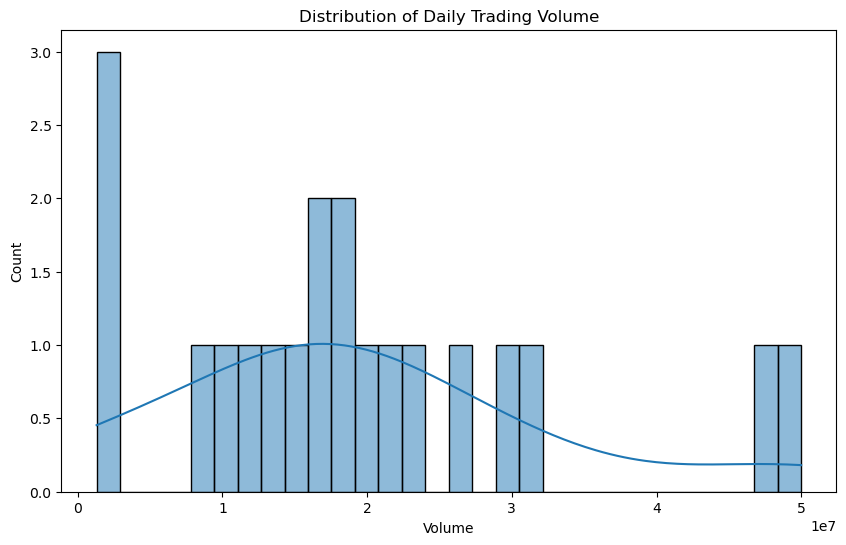

In [19]:
# Histogram of Daily Trading Volume
plt.figure(figsize=(10,6))
sns.histplot(stock['volume'], bins=30, kde=True)
plt.title('Distribution of Daily Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Count')
plt.show()

In [20]:
# After reloading or initial load
stock['daily_range'] = abs(stock['close'] - stock['open'])

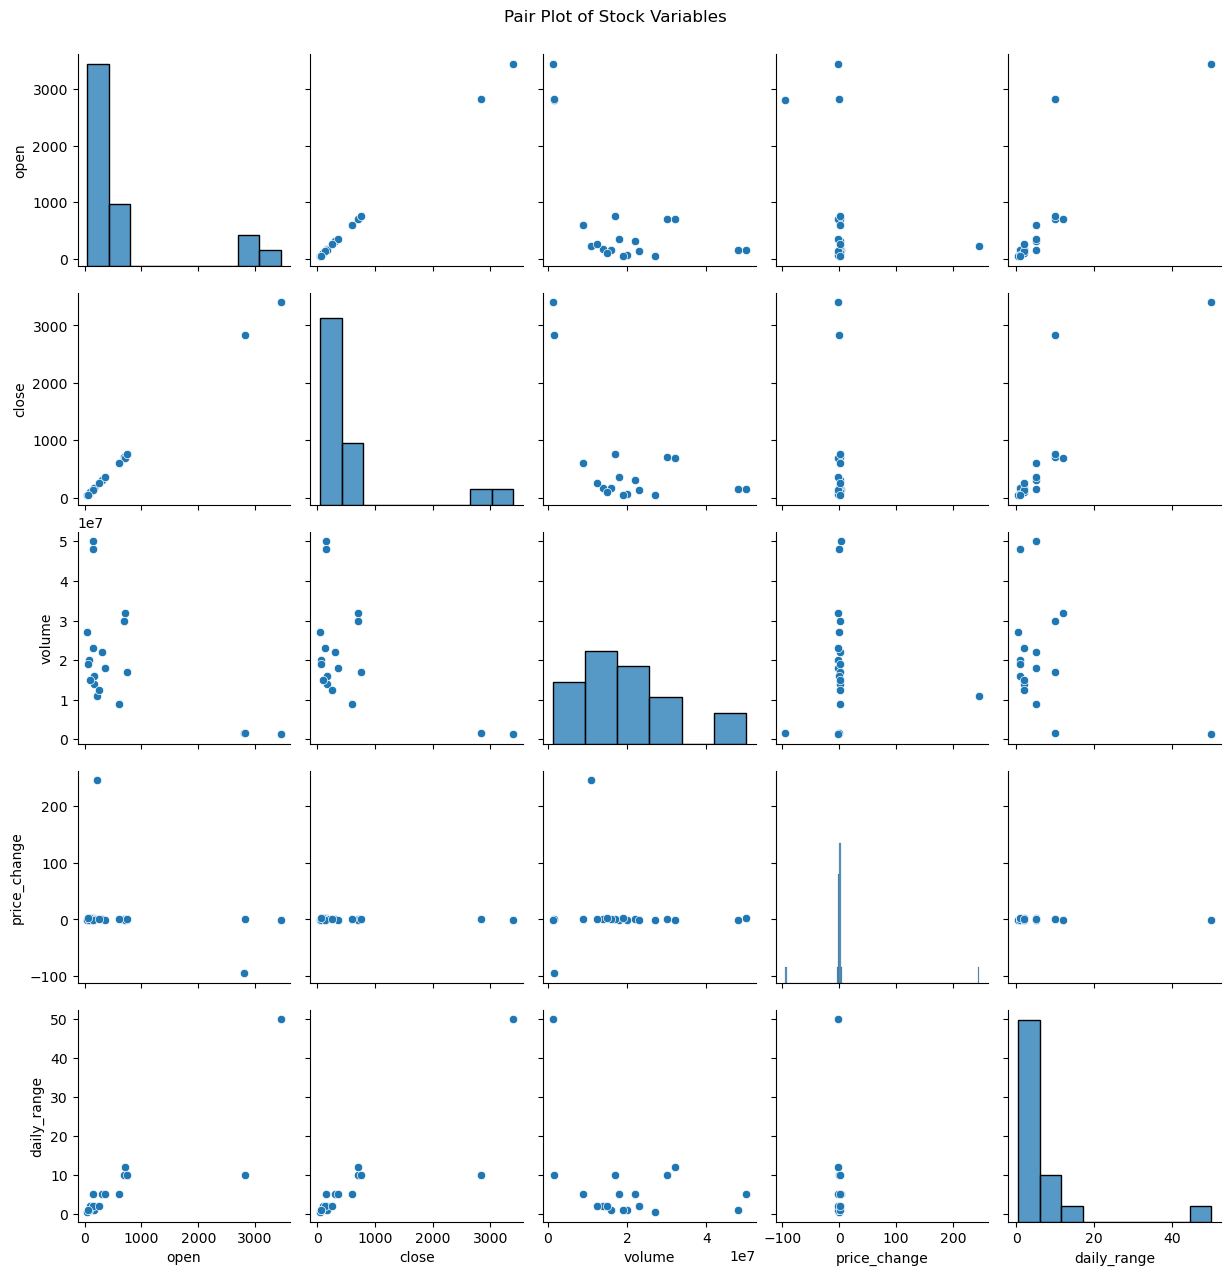

In [21]:
# Pair Plot to Explore Relationships Among Numeric Variables
sns.pairplot(stock[['open', 'close', 'volume', 'price_change', 'daily_range']])
plt.suptitle('Pair Plot of Stock Variables', y=1.02)
plt.show()

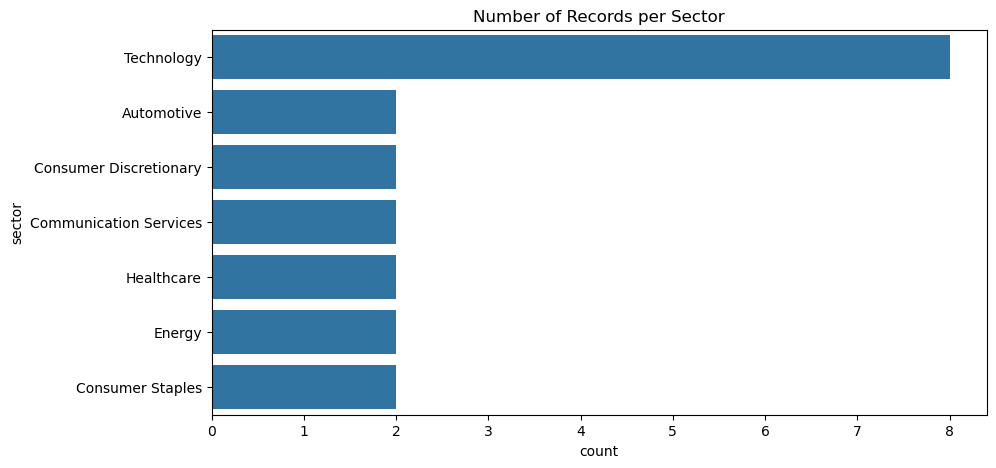

In [22]:
# Count Plot of Number of Tickers per Sector
plt.figure(figsize=(10,5))
sns.countplot(y='sector', data=stock, order=stock['sector'].value_counts().index)
plt.title('Number of Records per Sector')
plt.show()

In [23]:
stock.to_csv('stock_market_2025_cleaned.csv', index=False)
print("DataFrame saved as CSV file.")

DataFrame saved as CSV file.


In [ ]:
# Cleanup
cursor.close()
conn.close()
print("Database connection closed.")